## About this Project

In this project, you will implement a simple convolutional neural network that can recognize digits using [PyTorch](https://pytorch.org/).

https://github.com/utsavsharma1990/DigitRecognizePytorch.git



<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [1]:
%load_ext autoreload

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [3]:
%autoreload 2
# First off, import some packages
import torch
import torch.nn as nn
from torch.nn import functional as F

from torchvision import datasets, transforms
import torchvision

import matplotlib.pyplot as plt
from helper import *

import numpy as np
%matplotlib notebook
print('You\'re running python %s' % sys.version.split(' ')[0])

# Seed the random number generator
torch.manual_seed(1)
torch.cuda.manual_seed(1)

# Check whether you have a gpu
# If you have a gpu, model training will be done on gpu
# which is significantly faster than training on cpu
gpu_available = torch.cuda.is_available()
print ("GPU is available:",gpu_available)

You're running python 3.7.4
GPU is available: False


C:\Users\Utsav.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


## Convolutional Neural Network

### Part One:  Loading the Dataset and Setting up Dataloader

In [4]:
# Setup the training set and test set
trainset = datasets.MNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.MNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

# Setting up dataloader
# A dataloader stacks small batches (128 in our case) of dataset 
# into Tensor for ease of training.
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, drop_last=True, batch_size=512, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, shuffle=True, drop_last=False, batch_size=512, num_workers=2)

Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw




Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw
Processing...


C:\Users\Utsav.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


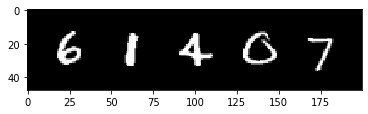

In [5]:
# Visualize the data
# The following line gets us small batch of data
# X is a tensor of size (128, 1, 28, 28) that contains
# a batch of images
# y is a tensor of size (128) that contains the labels  
# in X
X, y = iter(trainloader).next()

def visualize_data(X):
    img_grid = torchvision.utils.make_grid(X[:5], padding=10)
    img_grid = img_grid.numpy()
    plt.imshow(np.transpose(img_grid, (1,2,0)), interpolation='nearest')
    return

visualize_data(X)

### Part Two: Define a convolutional neural network [Partially Graded]
#### Define a building block of a convolutional neural network

In [6]:
class Block(nn.Module):
    def __init__(self, in_channel, out_channel, kernel_size=3, stride=1):
        super(Block, self).__init__()
        
        self.in_channel = in_channel
        self.out_channel = out_channel
        self.kernel_size = kernel_size
        self.stride = stride
        
        # This block contains a convolutional layer
        # then a batch normalization layer
        
        self.conv = nn.Conv2d(in_channel, out_channel, kernel_size, stride)
        self.bn = nn.BatchNorm2d(out_channel)
        return
    
    def forward(self, x):
        # passes the input image through a convolutional layer
        # followed by a batch normalization layer and relu transition
        out = F.relu(self.bn(self.conv(x)))
        return out

In [7]:
# Create a block that is made up of 10 filters size 3x3 and stride 1

# The block takes in a image of 1 channel
Block1 = Block(1, 10, 3, 1)
out = Block1(X)

# After passing our image through block 1
# we get the following tensor
print(out.shape)

torch.Size([512, 10, 26, 26])


#### Build a convolutional neural network using the block class [Graded]
In this section, you will build a convolutional network that consists of 4 blocks, an average pooling layer and a fully connected layer. We have created the first block for you. What you need to do is create the rest of the blocks based on the specification.  

You can see that `self.block1` is initialized with `Block()`. Below it are the specs for the other 3 blocks.

In other words, your solution should be 3 lines that intialize `self.block2`, `self.block3`, and `self.block4` where it says `# Your code here`. You need to pass in the appropriate parameters to `Block(input_size, num_filters,kernel_size, stride)`. Note that the input of one layer is the output of the previous layer.

Please do not change the name of the layers or else you risk breaking the autograder code!

In [53]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__() 
        # First block takes in the image
        # Filter specification:
            # Num filters=16, kernel size 3, stride 1
        self.block1 = Block(1, 16, 3, 1)
        
        # TODO
        # Second block takes in the output of the first block
        # Filter specification:
            # Num filters=32, kernel size 3, stride 1
        self.block2 = None
        
        # TODO
        # Third block takes in the output of the 2nd block
        # Filter specification:
            # Num filters=64, kernel size 3, stride 1
        self.block3 = None
        
        # TODO
        # Third block takes in the output of the 3rd block
        # Filter specification:
            # Num filters=128, kernel size 3, stride 1
        self.block4 = None
        
        # This is the average pooling layer
        # This is applied to the output of the last convolutional layer
        # Essentially, it averages feature maps spatially to a single number
        # For instance, if the output of the last conv layer is of size (128, 15, 4, 4)
        # the following layer will average the 4x4 array into a single number
        # so the output of applying this layer would have size (128, 15, 1, 1)
        # This operation vectorize the feature maps so that we can have a vector
        # that can be passed into a simple linear layer for classification
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        
        # Create a linear layer
        # the dataset has 10 classes
        # the model should output 10 belief values
        self.fc = nn.Linear(128, 10)
        
        # YOUR CODE HERE
        #raise NotImplementedError()
        self.block2 = Block(self.block1.out_channel, 32, 3, 1)
        self.block3 = Block(self.block2.out_channel, 64, 3, 1)
        self.block4 = Block(self.block3.out_channel, 128, 3, 1)
        return
    
    def forward(self, x):
        batch_size = x.size(0)
        out = self.block1(x)
        out = self.block2(out)
        out = self.block3(out)
        out = self.block4(out)
        
        # .squeeze() operation remove unnecessary dimension
        # i.e if X is of shape (128, 128, 1, 1)
        # X.unsqueeze() becomes (128, 128)
        out = self.avgpool(out).squeeze()
        out = self.fc(out)
        return out

In [54]:
# Create a model
model = ConvNet()

# Move the model to a cuda gpu
# Doing this step allows up to do training on gpu
# and gain significant speed up
if gpu_available:
    model = model.cuda()

### Part Three: Define a Loss Function and Optimizer [Graded] 

You are going to define the loss function and the optimizer. You should familiarize yourself with looking up PyTorch documentation.

#### Loss function [Graded]
The loss function should be the **cross entropy loss**. You can also implement the loss function yourself but we strongly suggest you use PyTorch's implementation -- it should be one short call to a [library](https://pytorch.org/docs/stable/nn.html) function.

In [60]:
#TODO: Define the loss function
loss_fn = None

# YOUR CODE HERE
#raise NotImplementedError()
loss_fn = nn.CrossEntropyLoss()

#### Optimizer [Graded]
I the next cell, you will define an **SGD optimizer**. Again, you should just call one library function from [`torch.optim`](https://pytorch.org/docs/stable/optim.html). In addition to passing in the model parameters, please set <code>lr=0.1</code>.

In [65]:
#TODO: Define the optimizer
optimizer = None

# YOUR CODE HERE
#raise NotImplementedError()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### Part Four: Train the Network

In this section, you are going to implement the <code>train</code> function. Please see the `#TODO`s in the code stub for specifications. Your solution should be one line for each todo (that is, 3 lines total). 

- `logits` is the output of a forward pass - to obtain them call `model` on the current mini-batch `X`.
- `loss` should be calculated with the loss function `loss_fn` defined before (HINT: look at the tests above to see how the loss function is called).
- Finally, you need to back propagate by calling `loss.backward()` on the loss function (HINT: This should be really straight-forward).

In [68]:
def train(model, optimizer, loss_fn, trainloader):
    '''
    Input:
        model - ConvNet model
        optimizer - optimizer for the model
        loss_fn - loss function 
        trainloader - the dataloader
    
    Output:
        running loss - the average loss for each minibatch
    '''
    
    # Set the model into train mode
    model.train()
    
    # Create a variable to keep track of the running loss
    running_loss = 0.0
    
    # iterate through trainloader
    # each iterate, you will get a batch of images X, and labels, y
    for i, (X, y) in enumerate(trainloader):
        
        if gpu_available:
            # Move the data to cuda gpu to accelerate training
            X, y = X.cuda(), y.cuda()
        
        # zero the parameter gradient
        optimizer.zero_grad()
        
        # TODO: Do a forward pass the get the logits
        logits = None
        
        # TODO: Evaluate the loss
        loss = None
        
        # TODO: Do a backward pass by calling 
        # .backward()
        
        # YOUR CODE HERE
        #raise NotImplementedError()
        logits = model(X)
        loss = loss_fn(logits,y)
        loss.backward()
        
        # update the parameters
        optimizer.step()
        
        # update the loss
        running_loss += loss.item()
    return running_loss / len(trainloader)

In [71]:
# The following code will train the model
# Running this cell should take about three minutes. A progress ber will display speed and duration of training.

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
    running_loss = train(model, optimizer, loss_fn, trainloader)
    print('Running Loss for Epoch [{}/ {}]: {:.4f}'.format(epoch + 1, num_epochs, running_loss))

Running Loss for Epoch [1/ 10]: 1.6017
Running Loss for Epoch [2/ 10]: 0.8311
Running Loss for Epoch [3/ 10]: 0.4367
Running Loss for Epoch [4/ 10]: 0.2765
Running Loss for Epoch [5/ 10]: 0.2043
Running Loss for Epoch [6/ 10]: 0.1652
Running Loss for Epoch [7/ 10]: 0.1425
Running Loss for Epoch [8/ 10]: 0.1269
Running Loss for Epoch [9/ 10]: 0.1126
Running Loss for Epoch [10/ 10]: 0.1036



### Part Five: Test the network on the test data

In this section, you will implement <code>pred</code> that takes in the output of the forward pass (the logits) and outputs its prediction (i.e. the most likely class label). HINT: All you need to do is find the label that has the highest output. 

In [72]:
def pred(logits):
    # TODO Calculate the prediction based using torch.argmax
    # YOUR CODE HERE
    #raise NotImplementedError()
    prediction = torch.argmax(logits,dim=1)
    return prediction

In [75]:
# the following code will yse your pred function and evaluate the whole test set and print your model's accuracy

total = 0.0
correct = 0.0
model.eval()
with torch.no_grad():
    for X, y in testloader:
        X, y = X.cuda(), y.cuda()
        logits = model(X)
        
        prediction = pred(logits) 
        total += X.size(0)
        correct += (prediction == y).sum().item()

print('Accuracy of the model: {:.4}%'.format(correct / total * 100))

Accuracy of the model: 95.83%


Prediction:  [7, 3, 8, 0, 4]


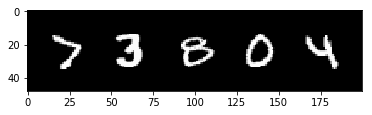

In [76]:
# Visualize some of the test images 
# and see their prediction

test_iterator = iter(testloader)
X_test, y_test = test_iterator.next()
X_test, y_test = X_test[:5], y_test[:5]
visualize_data(X_test)
model.eval()
with torch.no_grad():
    logits = model(X_test.cuda())
    prediction = pred(logits)
print("Prediction: ", prediction.tolist())